# Análisis de sentimiento
Se refiere al uso de procesamiento de lenguaje natural, análisis de texto y lingüística computacional para identificar y extraer información subjetiva de los recursos. Desde el punto de vista de la minería de textos, el análisis de sentimientos es una tarea de clasificación masiva de documentos de manera automática, en función de la connotación positiva o negativa del lenguaje ocupado en el documento.

## Análisis del Problema
Analizar los sentimientos de twitter del WALC 2019

![Autos ROC](img/walc.jpg)

In [143]:
library(lubridate)
library(twitteR)
library(stringr)
library(ggplot2)
library(xlsx)
library(base64enc)
library(tm)
library(wordcloud)
library(RColorBrewer)


download.file(url="http://curl.haxx.se/ca/cacert.pem",
destfile="cacert.pem") #downloads the certificate

api_key <- "QxJVwsr1emy2zx4NDF9GomqF8"
api_secret <- "HpsbjLisWp8dzaJ5SjquNJGM0pkYaS83pXSDQ7PNYuh7NRlfn0"
access_token <- "1003669823325392896-ng93NuiPLNU4WNDsnDJBjjsCcX0ulS"
access_token_secret <- "RnHDGUl8v28MoClWw9dHRRfYKXE0eO2tBv1biSdngpdeS"
setup_twitter_oauth(api_key, api_secret, access_token, access_token_secret)

[1] "Using direct authentication"


In [144]:
origop <- options("httr_oauth_cache")
options(httr_oauth_cache = TRUE)

In [145]:
tuits <- twitteR::searchTwitteR("walc2019", n=1000, lang="es", since="2019-01-01", until="2019-11-29",
                                 locale=NULL, geocode=NULL, sinceID=NULL, maxID=NULL,
                                 resultType=NULL, retryOnRateLimit=1200000)
# Es recomendable guardar los datos en disco 
# ya que su descarga de internet puede ser muy lenta.
#save(tuits,file = "iphone_w.RData")
df <- do.call("rbind", lapply(tuits, as.data.frame))
write.csv(df, file="data.csv")

Warning message in doRppAPICall("search/tweets", n, params = params, retryOnRateLimit = retryOnRateLimit, :
"1000 tweets were requested but the API can only return 82"

In [146]:
tuits

[[1]]
[1] "isocguatemala: RT @lacnic: Esta semana participamos del #WALC2019 en Guatemala. Encuentra información sobre este evento aquí https://t.co/sS6QDijVtd https…"

[[2]]
[1] "isocguatemala: RT @frodas: Generando data para el Cloud Computing y su posterior análisis de Big Data con herramientas especializadas dentro del Track 06…"

[[3]]
[1] "isocguatemala: RT @frodas: El Cloud Computing y el Big Data con la integración de la Estadística pura y aplicada a través de algoritmos, permiten la inter…"

[[4]]
[1] "isocguatemala: RT @abelenda01: estupenda la organización! Muy agradecido de poder ser parte de este #WALC2019 <U+0001F1EC><U+0001F1F9><U+0001F1FA><U+0001F1FE>"

[[5]]
[1] "isocguatemala: RT @medinillag: #WALC2019 que excelente experiencia!!!!"

[[6]]
[1] "isocguatemala: RT @jasda1974: #WALC2019 IOT-BIG DATA MUY BIEN"

[[7]]
[1] "isocguatemala: RT @germanviniciog: #WALC2019  Evento con fines educativos tecnológicos, fortaleciendo las habilidades de cada participante. Excelente Ev

In [147]:
tuits$text

NULL

In [148]:
limpiar.tuits <- function(tuit){
    # Eliminar los links
    texto <- tuit$text
    texto <- str_replace_all(texto,"(f|ht)(tp)(s?)(://)(.*)[.|/](.*)", " ")
    # Elimina la referencia a un retuit
    texto <- str_replace_all(texto,"(RT|via)((?:\\b\\W*@\\w+)+)", " ")
    # Elimina los #hashtag
    texto <- str_replace_all(texto,"#\\w+", " ")
    # Elimina la referencia a @usuarios
    texto <- str_replace_all(texto,"@\\w+", " ")
    # Elimina los signos de puntuaciÃ³n
    texto <- str_replace_all(texto,"[[:punct:]]", " ")
    # Elimina los numeros
    texto <- str_replace_all(texto,"[[:digit:]]", " ")
    # Elimina espacios innecesarios
    texto <- str_replace_all(texto,"[ \t]{2,}", " ")
    texto <- str_replace_all(texto,"^\\s+|\\s+$", "")
    texto <- str_replace_all(texto,"\\n", "")
    # Retorna el texto limpio y la fecha de publicacin
    list(texto =texto,fecha = as.character(tuit$created))
    }

In [149]:
#Limpiar tuits
tuits.limpios <- lapply(tuits,limpiar.tuits)
tuits.limpios[[1]]

$texto
[1] "Esta semana participamos del en Guatemala Encuentra información sobre este evento aquí"

$fecha
[1] "2019-11-15 22:17:51"

In [150]:
#Carga de palabras positivas
palabras.positivas <-read.csv("Palabras-Positivas.csv",stringsAsFactors = F)
palabras.positivas <- as.vector(palabras.positivas[,1])
#Carga de palabras negativas
palabras.negativas <-read.csv("Palabras-Negativas.csv",stringsAsFactors = F)
palabras.negativas <- as.vector(palabras.negativas[,1])

In [151]:
palabras.positivas

[1] "abogó"               "abrazo"              "abunda"             
   [4] "abundancia"          "abundante"           "abundar"            
   [7] "accesible"           "aclamación"          "aclamado"           
  [10] "aclamar"             "aclarar"             "aclaró"             
  [13] "acogedor"            "acomodadizo"         "acomodaticia"       
  [16] "acomodaticio"        "acreditado"          "actualizable"       
  [19] "actualizado"         "adaptable"           "adaptado"           
  [22] "adaptar"             "adecuado"            "adelantamiento"     
  [25] "adelantar"           "adherirse"           "admirable"          
  [28] "admirablemente"      "admiración"          "admirador"          
  [31] "admirar"             "admirativamente"     "admirativo"         
  [34] "adorable"            "adoración"           "adorada"            
  [37] "adorado"             "adorador"            "adoradora"          
  [40] "adorando"            "adorar"              "adulación"          
  [43] "adulador"            "aduladora"           "adular"             
  [46] "afabilidad"          "afable"              "afablemente"        
  [49] "afecto"              "afectuosamente"      "afición"            
  [52] "aficionado"          "afilado"             "afinidad"           
  [55] "afirmación"          "afirmar"             "afirmativamente"    
  [58] "afirmativo"          "afluencia"           "afortunadamente"    
  [61] "afortunado"          "ágil"                "agilidad"           
  [64] "ágilmente"           "agraciado"           "agrada"             
  [67] "agradabilidad"       "agradable"           "agradablemente"     
  [70] "agradecer"           "agradecido"          "agudeza"            
  [73] "agudo"               "ahorrador"           "ahorrativo"         
  [76] "ahorro"              "ahorros"             "ajustable"          
  [79] "alabando"            "alabanza"            "alabar"             
  [82] "alcista"             "alegrar"             "alegre"             
  [85] "alegremente"         "alegría"             "alentador"          
  [88] "alentadoramente"     "aleteo"              "alimento"           
  [91] "alivio"              "altruista"           "alucinante"         
  [94] "ama"                 "amabilidad"          "amable"             
  [97] "amablemente"         "amado"               "amanecer"           
 [100] "amante"              "ambiciosamente"      "ambicioso"          
 [103] "amigablemente"       "amistad"             "amistoso"           
 [106] "amor"                "amoroso"             "ampliamente"        
 [109] "amplio"              "ángel"               "angelical"          
 [112] "animado"             "animar"              "ánimo"              
 [115] "ansioso"             "apasionadamente"     "apasionado"         
 [118] "apelar"              "aplaudir"            "apoteosis"          
 [121] "apoya"               "apoyado"             "apoyar"             
 [124] "apoyarse"            "apoyo"               "aprecia"            
 [127] "apreciable"          "apreciado"           "apreciar"           
 [130] "apreciativamente"    "apreciativo"         "aprobación"         
 [133] "aprobado"            "aprobar"             "apropiado"          
 [136] "ardiente"            "ardientemente"       "armonía"            
 [139] "armoniosamente"      "armonioso"           "armonizar"          
 [142] "articular"           "asegurando"          "asegurar"           
 [145] "asequible"           "asequibles"          "asombrado"          
 [148] "asombrar"            "asombro"             "asombrosamente"     
 [151] "asombroso"           "aspiración"          "aspiraciones"       
 [154] "aspirar"             "astutamente"         "atento"             
 [157] "atracción"           "atractivo"           "atraer"             
 [160] "atrevidamente"       "atrevido"            "audible"            
 [163] "auge"                "auténtico"           "autodeter

In [152]:
palabras.negativas

[1] "abandonar"            "abandonos"            "abaratar"            
   [4] "abatido"              "abatimiento"          "abigarrado"          
   [7] "abismal"              "abismalmente"         "abismo"              
  [10] "abollado"             "abolladura"           "abolladuras"         
  [13] "abominable"           "abominablemente"      "abominación"         
  [16] "abominar"             "aborrecedores"        "aborta"              
  [19] "abortado"             "abortar"              "aborto"              
  [22] "abrasador"            "abrasadoramente"      "abrasivo"            
  [25] "abruma"               "abrumado"             "abrumador"           
  [28] "abrumadora"           "abrumadoramente"      "abrumar"             
  [31] "abruptamente"         "abrupto"              "absurda"             
  [34] "absurdamente"         "absurdo"              "aburrida"            
  [37] "aburrida"             "aburrido"             "aburrimiento"        
  [40] "abusa"                "abusada"              "abusado"             
  [43] "abusiva"              "abusivo"              "abuso"               
  [46] "abusos"               "accidental"           "accidente"           
  [49] "accidentes"           "acobardar"            "acosa"               
  [52] "acosado"              "acosar"               "acose"               
  [55] "acoso"                "acusa"                "acusación"           
  [58] "acusaciones"          "acusando"             "acusar"              
  [61] "acusatoriamente"      "acuso"                "adictivo"            
  [64] "adicto"               "adictos"              "adoctrinamiento"     
  [67] "adoctrinar"           "adulteración"         "adulterado"          
  [70] "adulterar"            "adversaria"           "adversario"          
  [73] "adversidad"           "adverso"              "advertencia"         
  [76] "aflicción"            "afligido"             "afligir"             
  [79] "afligirse"            "afrenta"              "agonía"              
  [82] "agonías"              "agónicamente"         "agonizante"          
  [85] "agonizar"             "agotado"              "agotador"            
  [88] "agotamiento"          "agotar"               "agravación"          
  [91] "agravante"            "agravar"              "agraviado"           
  [94] "agravio"              "agresión"             "agresividad"         
  [97] "agresivo"             "agresor"              "agriamente"          
 [100] "agrietado"            "agrietarse"           "agrio"               
 [103] "aguafiestas"          "agujereado"           "agujero"             
 [106] "ahogar"               "ahogarse"             "ahogo"               
 [109] "airadamente"          "airado"               "aislado"             
 [112] "aislamiento"          "aislar"               "alarma"              
 [115] "alarmada"             "alarmado"             "alarmante"           
 [118] "alarmantemente"       "alborotador"          "alboroto"            
 [121] "alcahuete"            "alegación"            "alegar"              
 [124] "alergia"              "alergias"             "alérgico"            
 [127] "algarabía"            "alicaído"             "alienación"          
 [130] "alienado"             "alterar"              "altercado"           
 [133] "altivamente"          "alucinación"          "alucinar"            
 [136] "amargamente"          "amargo"               "amargura"            
 [139] "ambigüedad"           "ambiguo"              "ambivalencia"        
 [142] "ambivalente"          "amenaza"              "amenazador"          
 [145] "amenazadoramente"     "amenazante"           "amenazar"            
 [148] "amenazas"             "amiguismo"            "amonestación"        
 [151] "amonestador"          "amonestar"            "ampolla"             
 [154] "amputar"              "analfabeto"           "anarquía"            
 [157] "anarquismo"           "anarquista"         

In [153]:
extraer.puntaje <- function(tuits, palabras.positivas,palabras.negativas) {
  # Inicio de la funciÃ³n    
  puntajes <-  lapply(tuits,
  function(tuit, palabras.positivas, palabras.negativas) {
    # Extraemos el texto del tuit
    texto <- tuit$texto
    # Separamos el texto en palabras independientes
    palabras = unlist(str_split(texto, '\\s+'))
    # Conteo de palabras positivas
    positivos = !is.na(match(palabras, palabras.positivas))
    # Conteo de palabras negativas
    negativos = !is.na(match(palabras, palabras.negativas))
    # Diferencia entre palabras positivas y negativas
    puntaje = sum(positivos) - sum(negativos)
    # Se retorna el texto,puntaje y la fecha de publicaciÃ³n
    return(list(texto = tuit$texto,calificacion = puntaje,fecha = tuit$fecha))
  }, palabras.positivas, palabras.negativas)
  # Se convierte a un data.frame y se da formato a las columnas.
  salida <- data.frame(matrix(unlist(puntajes),ncol = 3,byrow = T),stringsAsFactors = F)
  colnames(salida) <- c("texto","puntaje","fecha")
  salida["fecha"] <- ymd_hms(salida[,3])
  salida["puntaje"] <- as.integer(salida[,2])
  return(salida)
  # Fin de la funciÃ³n
}

In [154]:
caso_iphone <- extraer.puntaje(tuits.limpios,palabras.positivas,palabras.negativas)

In [155]:
caso_iphone

texto,puntaje,fecha
<chr>,<int>,<dttm>
Esta semana participamos del en Guatemala Encuentra información sobre este evento aquí,0,2019-11-15 22:17:51
Generando data para el Cloud Computing y su posterior análisis de Big Data con herramientas especializadas dentro del Track,0,2019-11-15 22:17:30
El Cloud Computing y el Big Data con la integración de la Estadística pura y aplicada a través de algoritmos permiten la inter,0,2019-11-15 22:17:19
estupenda la organización Muy agradecido de poder ser parte de este <U+0001F1EC><U+0001F1F9><U+0001F1FA><U+0001F1FE>,2,2019-11-15 22:13:07
que excelente experiencia,1,2019-11-15 22:13:01
IOT BIG DATA MUY BIEN,0,2019-11-15 21:51:03
Evento con fines educativos tecnológicos fortaleciendo las habilidades de cada participante Excelente Even,0,2019-11-15 21:50:52
Adquiriendo y mejorando conocimientos,0,2019-11-15 21:50:36
Excelentes contenidos nuevos conocimientos <U+0001F44D><U+0001F3FB>,0,2019-11-15 21:50:28


In [156]:
caso_iphone$puntaje <- ifelse(caso_iphone$puntaje>-1,"Positivo","Negativo")

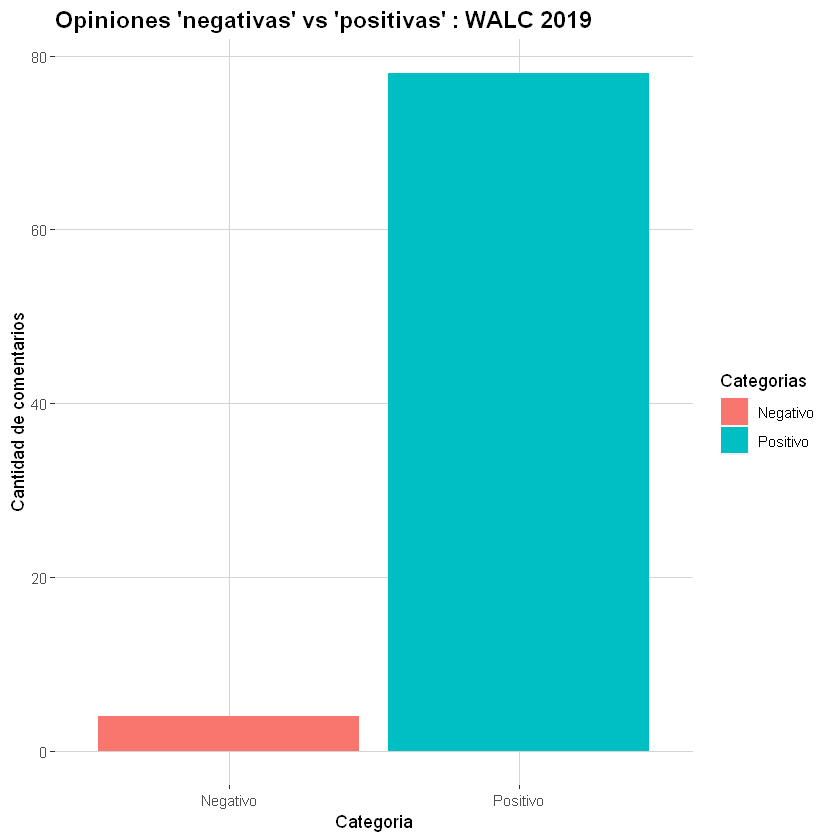

In [157]:
g <- ggplot(caso_iphone,aes(caso_iphone$puntaje,fill=caso_iphone$puntaje))+ geom_bar()
g + theme(panel.grid.major = element_line(colour = "gray83"), 
    plot.title = element_text(size = 14, face = "bold"), 
    panel.background = element_rect(fill = "gray100")) +
    labs(title = "Opiniones 'negativas' vs 'positivas' : WALC 2019", 
    x = "Categoria", y = "Cantidad de comentarios", 
    fill = "Categorias")

# Conclusiones

Se habla en redes sociales positivamente más del WALC que opiniones negativa en el último año.

In [158]:
tex2t<-str_replace_all(caso_iphone$texto,"semana","Vuelve Leo")

In [159]:
tex2t<-str_replace_all(tex2t,"Semana","Vuelve Leo")

In [160]:
tex2t<-str_replace_all(tex2t,"Vuelve Leo","\U0001f1ec\U0001f1f9\U0001f1fa\U0001f1fe'")

In [161]:
tex2t<-str_replace_all(tex2t,"Guatemala","Vuelve Leo")

In [162]:
tex2t

[1] "Esta <U+0001F1EC><U+0001F1F9><U+0001F1FA><U+0001F1FE>' participamos del en Vuelve Leo Encuentra información sobre este evento aquí"
 [2] "Generando data para el Cloud Computing y su posterior análisis de Big Data con herramientas especializadas dentro del Track"   
 [3] "El Cloud Computing y el Big Data con la integración de la Estadística pura y aplicada a través de algoritmos permiten la inter"
 [4] "estupenda la organización Muy agradecido de poder ser parte de este <U+0001F1EC><U+0001F1F9><U+0001F1FA><U+0001F1FE>"          
 [5] "que excelente experiencia"                                                                                                     
 [6] "IOT BIG DATA MUY BIEN"                                                                                                         
 [7] "Evento con fines educativos tecnológicos fortaleciendo las habilidades de cada participante Excelente Even"                    
 [8] "Adquiriendo y mejorando conocimientos"                                                                                         
 [9] "Excelentes contenidos nuevos conocimientos <U+0001F44D><U+0001F3FB>"                                                           
[10] "hands on ipv uno de los talleres en desarrollo"                                                                                
[11] "En el epílogo de una jornada muy enriquecedora Las telecomunicaciones y las TICs una oportunidad para el desarro"              
[12] "La conectividad a Internet me ha dejado un mal sabor de boca la limitación de hardware de los pcs y ello como resultado"       
[13] "In Vuelve Leo for"                                                                                                             
[14] "un evento de talla internacional con un nivel muy alto de expertos A pocas horas del cierre del evento"                        
[15] "In Vuelve Leo for"                                                                                                             
[16] "La conectividad a Internet me ha dejado un mal sabor de boca la limitación de hardware de los pcs y ello como resu"            
[17] "En el epílogo de una jornada muy enriquecedora Las telecomunicaciones y las TICs una oportunidad para el"                      
[18] "WALC en Fundación en Vuelve Leo City Vuelve Leo"                                                                               
[19] "El Track de Seguridad esta brutal"                                                                                             
[20] "hands on ipv uno de los talleres en desarrollo"                                                                                
[21] "Excelentes contenidos nuevos conocimientos <U+0001F44D><U+0001F3FB>"                                                           
[22] "otra <U+0001F1EC><U+0001F1F9><U+0001F1FA><U+0001F1FE>' de tracks"                                                              
[23] "Muy satisfecho con el evento"                                                                                                  
[24] "Excelente experiencia"                                                                                                         
[25] "Adquiriendo y mejorando conocimientos"                                                                                         
[26] "EXCELENTE"                                                                                                                     
[27] "Evento con fines educativos tecnológicos fortaleciendo las habilidades de cada participante Excelente Evento"                  
[28] "Excelente"                                                                                                                     
[29] "IOT BIG DATA MUY BIEN"                                                                                                         
[30] "En el último día del una excelente <U+0001F1EC><U+0001F1F9><U+0001F1FA><U+0001F1FE>' aprendiendo sobre In

In [163]:
text<-data.frame(doc_id="caso1",text=paste(unlist(data.frame(tex2t)), collapse=' '))

In [164]:
text

doc_id
1 caso1 
  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [165]:
ds <- DataframeSource(text)
corp <- Corpus(ds)
corp <- tm_map(corp,removePunctuation)
corp <- tm_map(corp,tolower)
corp <- tm_map(corp,removeNumbers)
# Para Textos en español
corp <- tm_map(corp, removeWords, stopwords("spanish"))
corp <- tm_map(corp, PlainTextDocument)
term.matrix <- TermDocumentMatrix(corp)
term.matrix <- as.matrix(term.matrix)
term.v <- sort(rowSums(term.matrix),decreasing=TRUE)
term.d <- data.frame(word = names(term.v),freq=term.v)

Warning message in tm_map.SimpleCorpus(corp, PlainTextDocument):
"transformation drops documents"

In [166]:
term.d 

,word,freq
,<fct>,<dbl>
leo,leo,16
vuelve,vuelve,16
äˆâ,äˆâ,16
å™ç,å™ç,16
å˜ã,å˜ã,16
™æ,™æ,15
excelente,excelente,13
talleres,talleres,12
participamos,participamos,11


Warning message in wordcloud(term.d$word, term.d$freq, scale = c(8, 0.2), min.freq = 3, :
"participamos could not be fit on page. It will not be plotted."

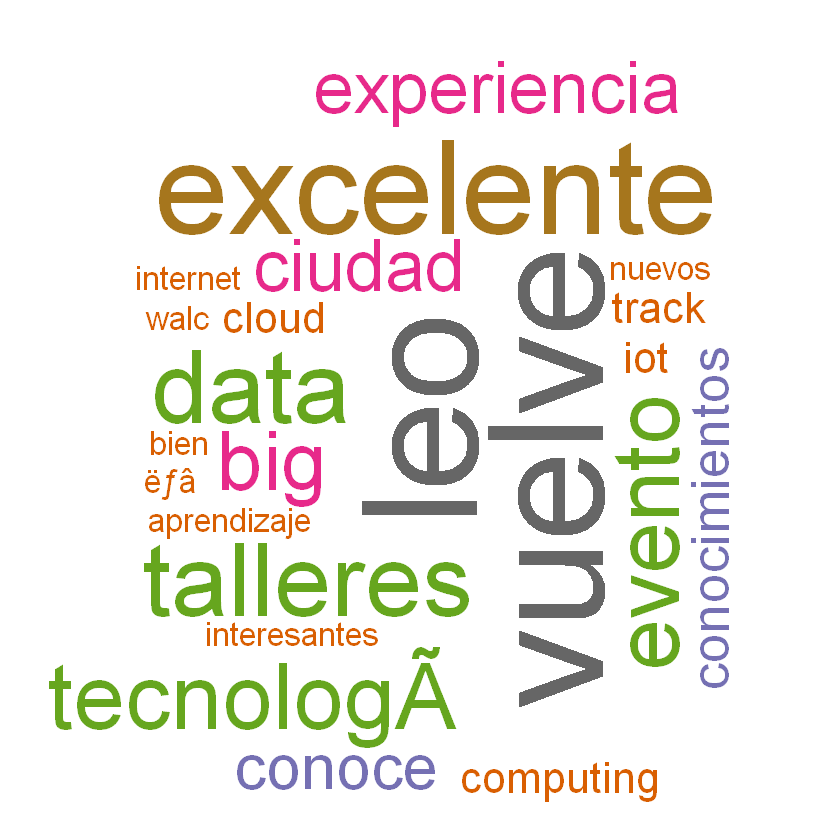

In [139]:
## Se grafica la nube de palabras
wordcloud(term.d$word,term.d$freq, scale=c(8,.2),min.freq=3, max.words=Inf, random.order=FALSE, rot.per=.15, colors=brewer.pal(8,"Dark2"))